In [1]:
import matplotlib.pyplot as plt
from IPython import display

from ExperienceReplay import ExperienceReplay
from Catch import Catch
from Qnet import Qnet 
import time


good_hyperparams =   {   
    "num_actions" : 3,
    "hidden_size" : 100,
    "grid_size" : 10,
    "learning_rate" : .2,
    "task" : "catch"
}


# Indices of out-of-band signals:
begin_action = 3
halt_action = 4 
grid_size = good_hyperparams['grid_size']

/home/gleech/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def refresh_screen(state, im, grid_size=10):
    display.clear_output(wait=True)
    plt.axis('off') 
    im.set_data(state.reshape((grid_size,)*2))
    display.display(plt.gcf())


def test(qnet, env, rounds=10):
    plt.ion()
    good_hyperparams['grid_size']
    returns = 0

    for e in range(rounds) :
        env.reset()
        game_over = False
        state = env.observe()
        embiggened = state.reshape((grid_size,)*2)
        im = plt.imshow(embiggened)
        refresh_screen(state, im)

        while not game_over :
            action, state, returns, game_over = qnet.sars_step(env, state, returns)
            if action is not halt_action :
                refresh_screen(state, im)
    
    percentOfOptimum = returns / rounds * 100
    print(returns, "points; ", "{}% of max return".format(percentOfOptimum))

In [3]:
# To immediately load and test an 1000-epoch model uncomment this cell:
"""
good_hyperparams =   {   
    "num_actions" : 3,
    "hidden_size" : 100,
    "grid_size" : 10,
    "learning_rate" : .2,
    "task" : "catch"
}
qnet = Qnet(good_hyperparams, "models/model.h5")
env = Catch(good_hyperparams['grid_size'])
test(qnet, env, rounds=10)
"""

'\ngood_hyperparams =   {   \n    "num_actions" : 3,\n    "hidden_size" : 100,\n    "grid_size" : 10,\n    "learning_rate" : .2,\n    "task" : "catch"\n}\nqnet = Qnet(good_hyperparams, "models/model.h5")\nenv = Catch(good_hyperparams[\'grid_size\'])\ntest(qnet, env, rounds=10)\n'

In [4]:
memories = 200
batches = 50
epochs = 300

qnet = Qnet(good_hyperparams)
env = Catch(good_hyperparams['grid_size'])
replayer = ExperienceReplay(capacity=memories, discount=.9)
qnet.train(replayer, env, epochs=epochs, batch_size=batches)
# qnet.save()

Epoch 000/100 | Loss 0.0966| Win count 0
Epoch 001/100 | Loss 0.2439| Win count 0
Epoch 002/100 | Loss 0.2023| Win count 0
Epoch 003/100 | Loss 0.2138| Win count 1
Epoch 004/100 | Loss 0.2091| Win count 2
Epoch 005/100 | Loss 0.1503| Win count 3
Epoch 006/100 | Loss 0.2455| Win count 4
Epoch 007/100 | Loss 0.2463| Win count 4
Epoch 008/100 | Loss 0.2138| Win count 5
Epoch 009/100 | Loss 0.2016| Win count 5
Epoch 010/100 | Loss 0.1689| Win count 6
Epoch 011/100 | Loss 0.2363| Win count 6
Epoch 012/100 | Loss 0.2441| Win count 6
Epoch 013/100 | Loss 0.2199| Win count 6
Epoch 014/100 | Loss 0.2203| Win count 6
Epoch 015/100 | Loss 0.2530| Win count 6
Epoch 016/100 | Loss 0.2016| Win count 6
Epoch 017/100 | Loss 0.2181| Win count 6
Epoch 018/100 | Loss 0.2665| Win count 6
Epoch 019/100 | Loss 0.1858| Win count 6
Epoch 020/100 | Loss 0.2489| Win count 7
Epoch 021/100 | Loss 0.2652| Win count 7
Epoch 022/100 | Loss 0.2032| Win count 8
Epoch 023/100 | Loss 0.1713| Win count 8
Epoch 024/100 | 

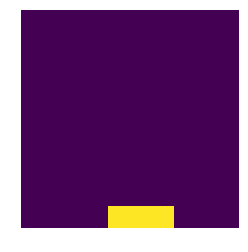

-2 points;  -20.0% of max return


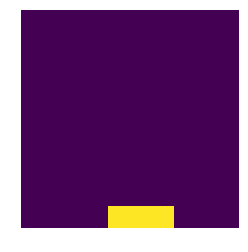

In [6]:
test(qnet, env, 10)